# 연습문제
1. 네이버 오픈 API 를 활용하여 네이버지식인 "전주여행" 과 "경주여행"을 검색
2. 명사를 추출
3. 빈도분석 (DataFrame)
4. 빈도시각화 (워드클라우드, nltk.Text)
5. Word2Vec




# 1. 네이버 open API 를 활용하여 검색 추출

- 검색어, no, title, link, description + title + '' + description

['전주', '곳', '추천', '추억', '체험', '감성', '추억', '여행', '테마', '박물관', '시간', '전북', '전북', '투어', '패스', '통합', '이용권', '전북', '핫', '여행지']
여행     409
전주     365
곳      130
달봉      98
코스      92
여수      71
옥       59
추천      58
제주도     57
맛집      57
마을      56
박       47
일       45
티비      36
국내      34
인       27
플루      26
전문      25
좀       20
질문      17
dtype: int64


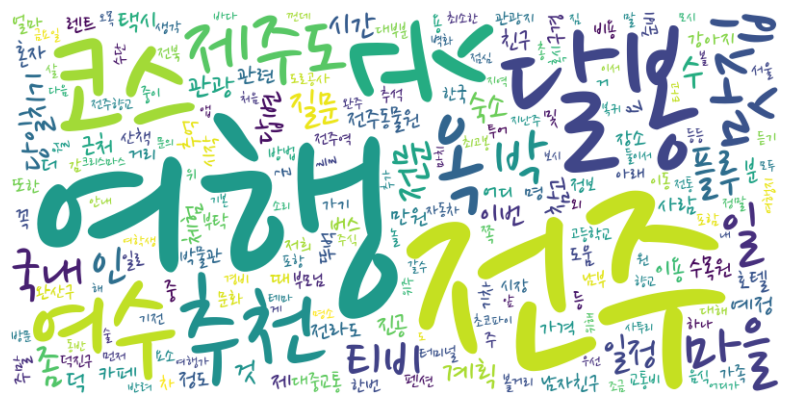

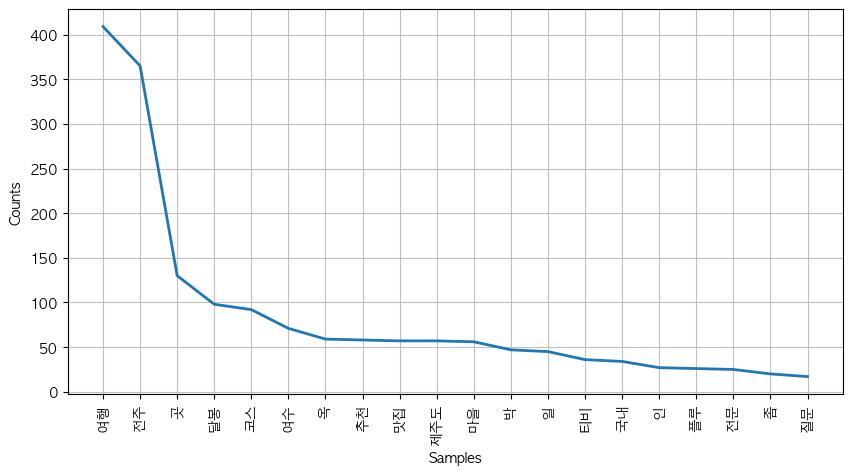

[('요', 0.9964527487754822), ('시간', 0.9962077140808105), ('덕', 0.9961574077606201), ('당일치기', 0.9960842132568359), ('분', 0.9960240721702576), ('추억', 0.996002197265625), ('진공', 0.9959897398948669), ('이동', 0.9959827065467834), ('옥', 0.9959161877632141), ('계획', 0.9958895444869995)]


In [6]:
import os
import sys
import urllib.request
import json
import re
from dotenv import load_dotenv
from konlpy.tag import Okt
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import Text
from gensim.models import Word2Vec

load_dotenv()
client_id = os.getenv('Client_ID')
client_secret = os.getenv('Client_Secret')

encText = urllib.parse.quote("전주여행")
url = f"https://openapi.naver.com/v1/search/kin.json?query={encText}&display=99" 
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
else:
    print("Error Code:" + rescode)
    sys.exit()

data = json.loads(response_body.decode('utf-8'))

okt = Okt()
texts = []
sentences = []

for item in data['items']:
    for field in ['title', 'description']:
        # HTML 태그, 특수문자 제거
        text = re.sub('<.*?>', '', item[field])
        texts.append(text)
        clean = re.sub('[^가-힣\s]', ' ', text)
        nouns = okt.nouns(clean)
        if nouns:
            sentences.append(nouns)

# 2. 명사 추출
all_nouns = sum(sentences, [])
print(all_nouns[:20])

# 3. 빈도분석
nouns_series = pd.Series(all_nouns)
freq = nouns_series.value_counts()
print(freq.head(20))

# 4. 워드클라우드
word_freq = freq.to_dict()
wordcloud = WordCloud(font_path='./data/NanumPenScript-Regular.ttf', background_color='white', width=800, height=400).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# nltk.Text plot
text_obj = Text(all_nouns)
plt.figure(figsize=(10, 5))
plt.rc('font', family='AppleGothic')
text_obj.plot(20)

# 5. Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, sg=1)
print(model.wv.most_similar('전주', topn=10))
